# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.3
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file

df = pd.read_parquet(r"C:\Users\Utkarsh Sharma\OneDrive\Desktop\EDA Assignment\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-1.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
datasets = (r"C:\Users\Utkarsh Sharma\OneDrive\Desktop\EDA Assignment\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records")

# Create a list of all the twelve files to read
file_list = os.listdir(datasets)

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(datasets, file_name)

        # Reading the current file
        current_data = pd.read_parquet(file_path)

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        current_data['tpep_pickup_datetime'] = pd.to_datetime(current_data['tpep_pickup_datetime'])
        current_data['pickup_date'] = current_data['tpep_pickup_datetime'].dt.date
        current_data['pickup_hour'] = current_data['tpep_pickup_datetime'].dt.hour
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in current_data['pickup_date'].unique():
            date_df = current_data[current_data['pickup_date'] == date]
            
            # Iterate through each hour of the selected date
            for hour in range(24):
                hour_df = date_df[date_df['pickup_hour'] == hour]

                # Sample 5% of the hourly data randomly
                if not hour_df.empty:
                    sample = hour_df.sample(frac=0.05, random_state=42)

                # add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])
        print(f"Processed and sampled {file_name}")

    # we initialised this empty DF earlier
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Processed and sampled 2023-1.parquet
Processed and sampled 2023-10.parquet
Processed and sampled 2023-11.parquet
Processed and sampled 2023-12.parquet
Processed and sampled 2023-2.parquet
Processed and sampled 2023-3.parquet
Processed and sampled 2023-4.parquet
Processed and sampled 2023-5.parquet
Processed and sampled 2023-6.parquet
Processed and sampled 2023-7.parquet
Processed and sampled 2023-8.parquet
Processed and sampled 2023-9.parquet


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [8]:
# Store the df in csv/parquet
df.to_parquet("C:/Users/Utkarsh Sharma/OneDrive/Desktop/EDA Assignment/Combine_trip_records.parquet")

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [9]:
# Load the new data file
df = pd.read_parquet(r"C:\Users\Utkarsh Sharma\OneDrive\Desktop\EDA Assignment\Combine_trip_records.parquet")

In [10]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour,Airport_fee
428,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0,NaN
1113,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0,NaN
819,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0,NaN
3192,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0,NaN
2995263,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,None,66,107,0,...,0.5,5.93,0.0,1.0,35.57,NaN,NaN,2023-01-01,0,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 428 to 2705104
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            fl

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [12]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)
df = df.drop(["pickup_date","pickup_hour"], axis = 1)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [13]:
# Combine the two airport fee columns
df["Combined_Airport_fee"] = df[["Airport_fee","airport_fee"]].max(axis=1)
df = df.drop(["airport_fee","Airport_fee"],axis=1)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [14]:
# check where values of fare amount are negative
df[df["fare_amount"]<0]


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Combined_Airport_fee


Did you notice something different in the `RatecodeID` column for above records?

In [15]:
# Analyse RatecodeID for the negative fare amounts
df[df["fare_amount"]<0]["RatecodeID"].value_counts()


Series([], Name: count, dtype: int64)

In [16]:
# Find which columns have negative values
num_df = df.select_dtypes(include = "number")
negative_col = (num_df<0).any()[(num_df<0).any()].index
negative_col

Index(['extra', 'mta_tax', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'Combined_Airport_fee'],
      dtype='object')

In [17]:
# fix these negative values
for col in negative_col:
    df[col] = df[col].mask(df[col]<0,0)


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [18]:
# Find the proportion of missing values in each column
df.isnull().mean()*100


VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.420903
trip_distance            0.000000
RatecodeID               3.420903
store_and_fwd_flag       3.420903
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.420903
Combined_Airport_fee     3.420903
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [19]:
# Display the rows with null values
df[df.isnull().any(axis=1)]


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Combined_Airport_fee
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,None,66,107,0,25.64,0.0,0.5,5.93,0.00,1.0,35.57,NaN,NaN
15,2,2023-01-01 00:41:50,2023-01-01 01:14:50,NaN,10.77,NaN,None,151,106,0,45.38,0.0,0.5,11.19,6.55,1.0,67.12,NaN,NaN
42,2,2023-01-01 00:37:21,2023-01-01 00:54:18,NaN,4.52,NaN,None,114,262,0,25.38,0.0,0.5,0.00,0.00,1.0,29.38,NaN,NaN
43,2,2023-01-01 00:44:03,2023-01-01 01:13:49,NaN,9.19,NaN,None,239,256,0,40.00,0.0,0.5,2.20,0.00,1.0,46.20,NaN,NaN
46,2,2023-01-01 00:50:55,2023-01-01 01:19:06,NaN,2.74,NaN,None,90,48,0,18.48,0.0,0.5,3.37,0.00,1.0,25.85,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896343,1,2023-09-30 23:18:31,2023-09-30 23:30:35,NaN,0.00,NaN,None,43,229,0,12.55,0.0,0.5,0.00,0.00,1.0,16.55,NaN,NaN
1896356,1,2023-09-30 23:42:07,2023-10-01 00:05:22,NaN,0.00,NaN,None,255,209,0,34.02,0.0,0.5,0.00,0.00,1.0,38.02,NaN,NaN
1896369,1,2023-09-30 23:59:39,2023-10-01 00:15:03,NaN,0.00,NaN,None,137,249,0,21.50,0.0,0.5,0.00,0.00,1.0,25.50,NaN,NaN
1896376,1,2023-09-30 23:47:09,2023-10-01 00:03:01,NaN,3.50,NaN,None,233,144,0,21.28,0.0,0.5,0.00,0.00,1.0,25.28,NaN,NaN


In [20]:
# Impute NaN values in 'passenger_count'
df.passenger_count = df.passenger_count.fillna(df.passenger_count.mean())
df.passenger_count.isnull().sum()

0

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [21]:
# Fix missing values in 'RatecodeID'
df.RatecodeID = df.RatecodeID.fillna(df.RatecodeID.mode()[0])
df.RatecodeID.isnull().sum()

0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [22]:
# handle null values in congestion_surcharge
df.congestion_surcharge = df.congestion_surcharge.fillna(df.congestion_surcharge.mean())
df.congestion_surcharge.isnull().sum()

0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [23]:
# Handle any remaining missing values
df.isnull().mean()*100

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
store_and_fwd_flag       3.420903
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
Combined_Airport_fee     3.420903
dtype: float64

In [24]:
df.store_and_fwd_flag = df.store_and_fwd_flag.fillna(df.store_and_fwd_flag.mode()[0])
df.store_and_fwd_flag.isnull().sum()

0

In [25]:
df.Combined_Airport_fee = df.Combined_Airport_fee.fillna(0)
df.Combined_Airport_fee.isnull().sum()

0

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [26]:
# Describe the data and check if there are any potential outliers present
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Combined_Airport_fee
count,1.896400e+06,1896400,1896400,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06,1.896400e+06
mean,1.733026e+00,2023-07-02 19:59:52.930795,2023-07-02 20:17:18.919563,1.369215e+00,3.858293e+00,1.612981e+00,1.652814e+02,1.640515e+02,1.163817e+00,1.991935e+01,1.588020e+00,4.952989e-01,3.547011e+00,5.965338e-01,9.990118e-01,2.898201e+01,2.307601e+00,1.380220e-01
min,1.000000e+00,2022-12-31 23:51:30,2022-12-31 23:56:06,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2023-04-02 16:10:08.750000,2023-04-02 16:27:43.500000,1.000000e+00,1.050000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-06-27 15:44:22.500000,2023-06-27 16:01:15,1.000000e+00,1.790000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.850000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2023-10-06 19:37:45,2023-10-06 19:53:39,1.369215e+00,3.400000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.190000e+01,2.500000e+00,5.000000e-01,4.420000e+00,0.000000e+00,1.000000e+00,3.094000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2023-12-31 23:57:51,2024-01-01 20:50:55,9.000000e+00,1.263605e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.431635e+05,2.080000e+01,4.000000e+00,2.230800e+02,1.430000e+02,1.000000e+00,1.431675e+05,2.500000e+00,1.750000e+00
std,4.476401e-01,NaN,NaN,8.773530e-01,1.294085e+02,7.267261e+00,6.400038e+01,6.980207e+01,5.081384e-01,1.055371e+02,1.829197e+00,4.855675e-02,4.054882e+00,2.187878e+00,2.907216e-02,1.064162e+02,6.548225e-01,4.575627e-01


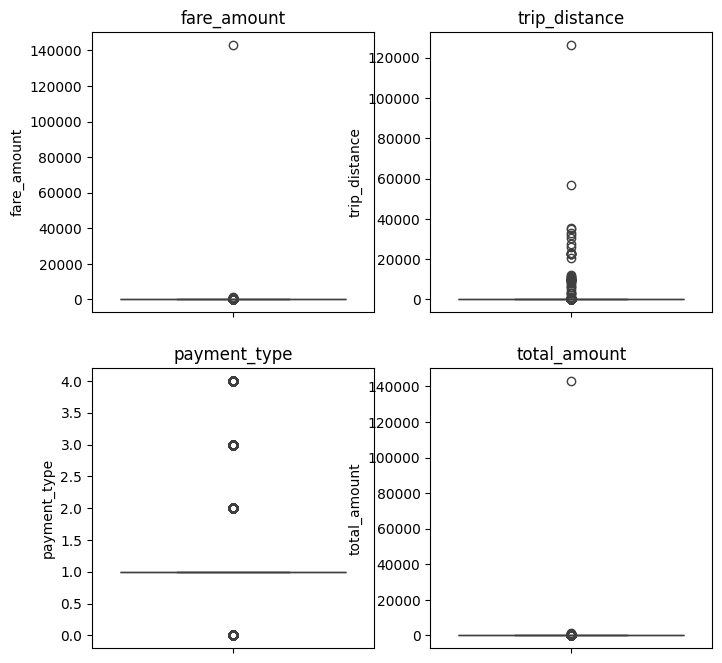

In [27]:
# Check for potential out of place values in various columns
check_col = ["fare_amount","trip_distance","payment_type","total_amount"]
plt.figure(figsize=(8,8))
for i, col in enumerate(check_col, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [28]:
# remove passenger_count > 6
df = df[df["passenger_count"] <= 6]

In [29]:
# Continue with outlier handling
df = df[~((df["trip_distance"] < 0.1) & (df["fare_amount"] > 300))]

df = df[~((df["trip_distance"] == 0 ) & (df["fare_amount"] == 0) & (df["PULocationID"] != df["DOLocationID"]))]

df = df[df["trip_distance"] <= 250]

df = df[df["payment_type"] != 0]

In [30]:
# Do any columns need standardising?
df["Pickup_Date"]=df["tpep_pickup_datetime"].dt.date

In [31]:
df["Pickup_Time_Min"]=df["tpep_pickup_datetime"].dt.time

In [32]:
df["Dropoff_Date"]=df["tpep_dropoff_datetime"].dt.date

In [33]:
df["Dropoff_Time_Min"]=df["tpep_dropoff_datetime"].dt.time

In [34]:
df.Pickup_Time_Min=df.Pickup_Time_Min.apply(lambda x: x.hour * 60 + x.minute + x.second/60).round(2)

In [35]:
df.Dropoff_Time_Min=df.Dropoff_Time_Min.apply(lambda x: x.hour * 60 + x.minute + x.second/60).round(2)

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [36]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Combined_Airport_fee',
 'Pickup_Date',
 'Pickup_Time_Min',
 'Dropoff_Date',
 'Dropoff_Time_Min']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

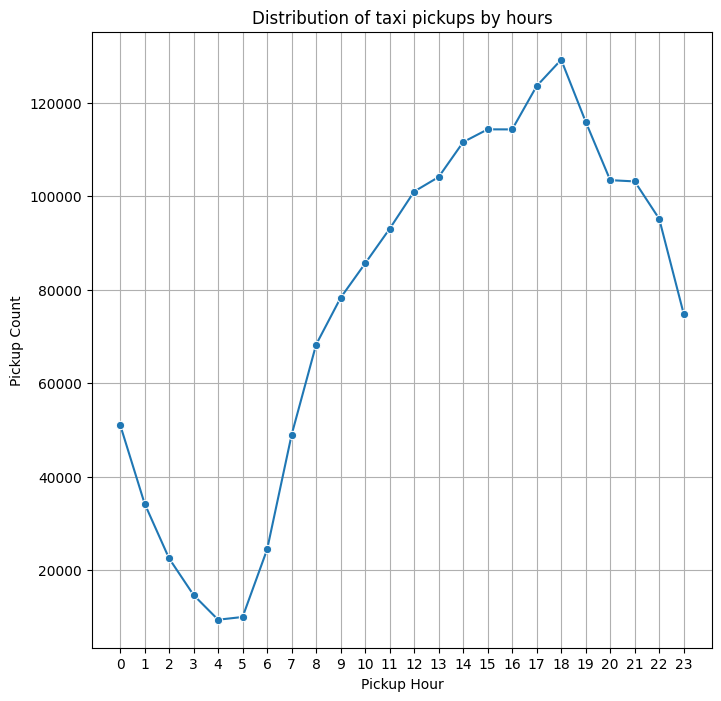

In [37]:
# Find and show the hourly trends in taxi pickups
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
trend_by_hours = df.groupby("pickup_hour").size().reset_index(name="pickup_count")

plt.figure(figsize=(8,8))
sns.lineplot(data=trend_by_hours, x= "pickup_hour", y = "pickup_count", marker="o")
plt.xlabel("Pickup Hour")
plt.ylabel("Pickup Count")
plt.title("Distribution of taxi pickups by hours")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

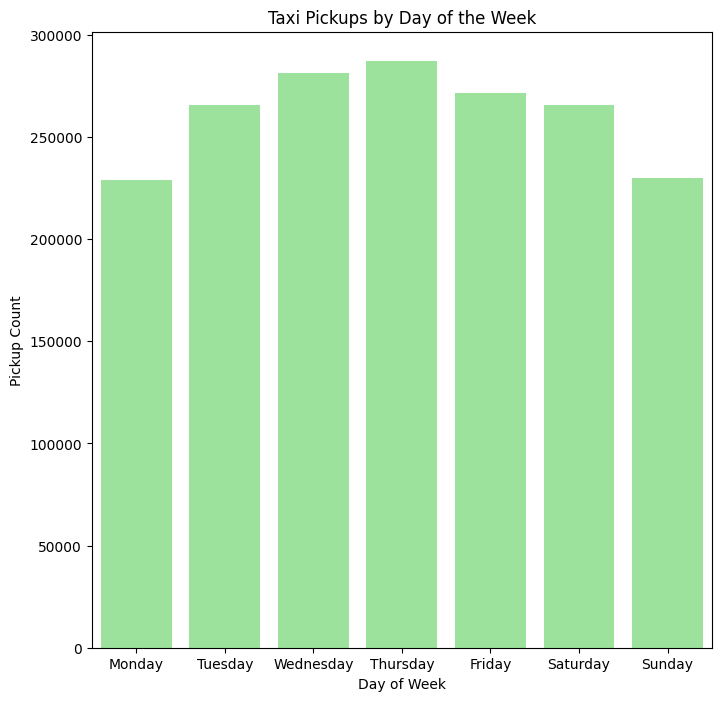

In [38]:
# Find and show the daily trends in taxi pickups (days of the week)
df["daily_pickup"] = df["tpep_pickup_datetime"].dt.day_name()

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["daily_pickup"] = pd.Categorical(df["daily_pickup"], categories=day_order, ordered=True)

daily_trend = df.groupby("daily_pickup").size().reset_index(name="daily_pickup_count")

plt.figure(figsize=(8,8))
sns.barplot(data=daily_trend, x="daily_pickup", y="daily_pickup_count", color="lightgreen")
plt.xlabel("Day of Week")
plt.ylabel("Pickup Count")
plt.title("Taxi Pickups by Day of the Week")
plt.show()

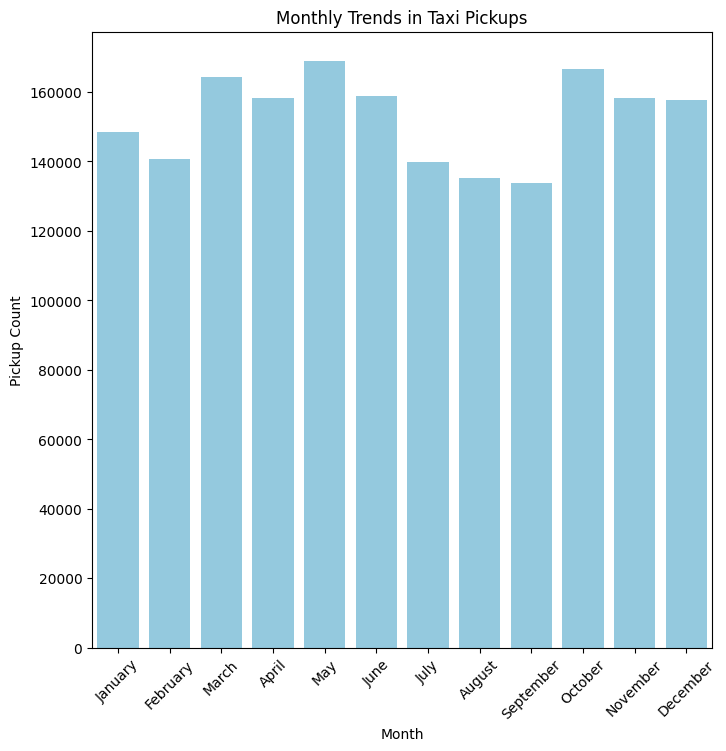

In [39]:
# Show the monthly trends in pickups
df["monthly_pickup"] = df["tpep_pickup_datetime"].dt.month_name()

month_order = ["January", "February", "March", "April", "May", "June","July", "August", "September", "October", "November", "December"]

df["monthly_pickup"] = pd.Categorical(df["monthly_pickup"], categories=month_order, ordered=True)

monthly_trend = df.groupby("monthly_pickup").size().reset_index(name="monthly_pickup_count")

plt.figure(figsize=(8,8))
sns.barplot(data=monthly_trend, x="monthly_pickup", y="monthly_pickup_count", color="skyblue")
plt.xlabel("Month")
plt.ylabel("Pickup Count")
plt.title("Monthly Trends in Taxi Pickups")
plt.xticks(rotation=45)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [40]:
# Analyse the above parameters
(df["tip_amount"] <= 0).sum()

410234

In [41]:
(df["fare_amount"] <= 0).sum()

575

In [42]:
(df["total_amount"] <= 0).sum()

329

In [43]:
(df["trip_distance"] <= 0).sum()

22928

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [44]:
# Create a df with non zero entries for the selected parameters.
selected_cols = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]
df_nonzero = df[(df[selected_cols] > 0).all(axis=1)]
df_nonzero

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,Combined_Airport_fee,Pickup_Date,Pickup_Time_Min,Dropoff_Date,Dropoff_Time_Min,pickup_hour,daily_pickup,monthly_pickup
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,15.48,2.5,0.00,2023-01-01,16.68,2023-01-01,21.77,0,Sunday,January
5,1,2023-01-01 00:42:56,2023-01-01 01:16:33,2.0,7.10,1.0,N,246,37,1,...,47.40,2.5,0.00,2023-01-01,42.93,2023-01-01,76.55,0,Sunday,January
6,2,2023-01-01 00:58:00,2023-01-01 01:08:31,2.0,1.59,1.0,N,79,164,1,...,19.68,2.5,0.00,2023-01-01,58.00,2023-01-01,68.52,0,Sunday,January
7,2,2023-01-01 00:16:06,2023-01-01 00:31:59,1.0,3.16,1.0,N,79,256,1,...,30.12,2.5,0.00,2023-01-01,16.10,2023-01-01,31.98,0,Sunday,January
8,2,2023-01-01 00:44:09,2023-01-01 01:01:17,1.0,7.64,1.0,N,132,95,1,...,42.54,0.0,1.25,2023-01-01,44.15,2023-01-01,61.28,0,Sunday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896394,1,2023-09-30 23:00:09,2023-09-30 23:59:38,4.0,18.40,2.0,N,132,148,1,...,89.00,2.5,0.00,2023-09-30,1380.15,2023-09-30,1439.63,23,Saturday,September
1896395,2,2023-09-30 23:46:34,2023-09-30 23:53:20,1.0,0.79,1.0,N,231,231,1,...,15.60,2.5,0.00,2023-09-30,1426.57,2023-09-30,1433.33,23,Saturday,September
1896396,1,2023-09-30 23:44:51,2023-09-30 23:49:05,3.0,0.50,1.0,N,158,68,1,...,12.95,2.5,0.00,2023-09-30,1424.85,2023-09-30,1429.08,23,Saturday,September
1896397,2,2023-09-30 23:11:05,2023-09-30 23:18:42,1.0,1.09,1.0,N,161,162,1,...,17.16,2.5,0.00,2023-09-30,1391.08,2023-09-30,1398.70,23,Saturday,September


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

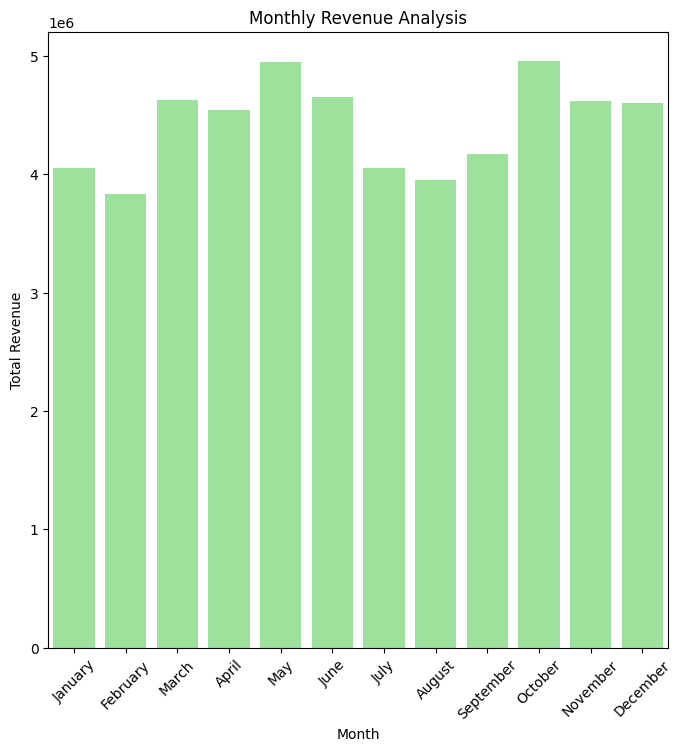

In [45]:
# Group data by month and analyse monthly revenue
df["pickup_month"] = df["tpep_pickup_datetime"].dt.month_name()

month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

df["pickup_month"] = pd.Categorical(df["pickup_month"], categories=month_order, ordered=True)

monthly_revenue = df.groupby("pickup_month")["total_amount"].sum().reset_index(name="monthly_revenue")

plt.figure(figsize=(8, 8))
sns.barplot(data=monthly_revenue, x="pickup_month", y="monthly_revenue", color="lightgreen")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.title("Monthly Revenue Analysis")
plt.xticks(rotation=45)
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [46]:
# Calculate proportion of each quarter
df["quarter"] = df["tpep_pickup_datetime"].dt.quarter
quarterly_revenue = df.groupby("quarter")["total_amount"].sum().reset_index(name="quarter_revenue")

total_revenue = quarterly_revenue["quarter_revenue"].sum()
quarterly_revenue["proportion"] = (quarterly_revenue["quarter_revenue"] / total_revenue)*100
quarterly_revenue.round(2)

,quarter,quarter_revenue,proportion
0,1,12514252.08,23.61
1,2,14140017.34,26.68
2,3,12171979.48,22.97
3,4,14174598.08,26.74


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

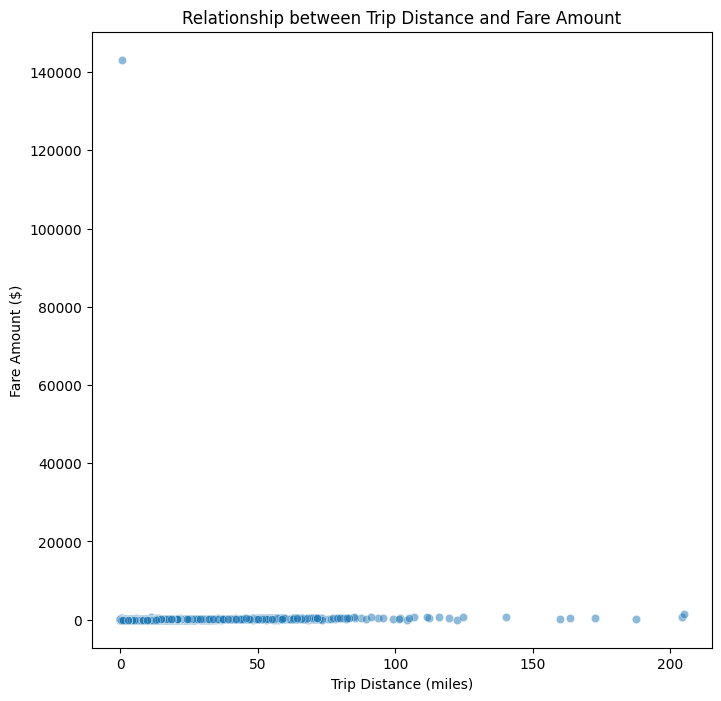

Correlation: 0.16


In [47]:
# Show how trip fare is affected by distance
df_nonzero = df[df["trip_distance"] > 0]

plt.figure(figsize=(8,8))
sns.scatterplot(data=df_nonzero, x="trip_distance", y="fare_amount", alpha=0.5)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title("Relationship between Trip Distance and Fare Amount")
plt.show()

correlation_value = df_nonzero["trip_distance"].corr(df_nonzero["fare_amount"]).round(2)
print("Correlation:", correlation_value)


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [48]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,Combined_Airport_fee,Pickup_Date,Pickup_Time_Min,Dropoff_Date,Dropoff_Time_Min,pickup_hour,daily_pickup,monthly_pickup,pickup_month,quarter
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,1.25,2023-01-01,7.30,2023-01-01,23.25,0,Sunday,January,January,1
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,0.00,2023-01-01,16.68,2023-01-01,21.77,0,Sunday,January,January,1
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,0.00,2023-01-01,14.05,2023-01-01,24.60,0,Sunday,January,January,1
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,0.00,2023-01-01,24.50,2023-01-01,29.92,0,Sunday,January,January,1
5,1,2023-01-01 00:42:56,2023-01-01 01:16:33,2.0,7.10,1.0,N,246,37,1,...,0.00,2023-01-01,42.93,2023-01-01,76.55,0,Sunday,January,January,1


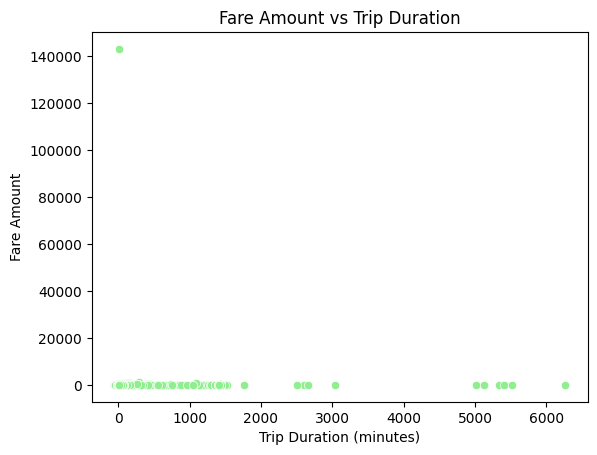

Correlation between trip duration & fare amount: 0.16


In [49]:
# Show relationship between fare and trip duration
df["trip_duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60

sns.scatterplot(data=df,x="trip_duration" , y="fare_amount", color="lightgreen")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount")
plt.title("Fare Amount vs Trip Duration")
plt.show()

df_nonzero = df[df["trip_distance"] > 0]
correlation = df_nonzero["trip_distance"].corr(df_nonzero["fare_amount"])
print(f"Correlation between trip duration & fare amount: {correlation.round(2)}")

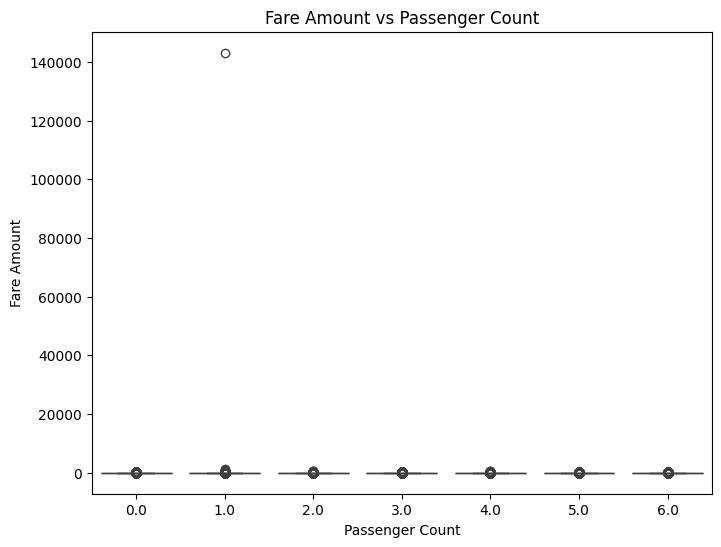

Correlation between Fare amount & Passenger count: 0.01


In [50]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="passenger_count", y="fare_amount")
plt.ylabel("Fare Amount")
plt.xlabel("Passenger Count")
plt.title("Fare Amount vs Passenger Count")
plt.show()

correlation = df["passenger_count"].corr(df["fare_amount"])
print(f"Correlation between Fare amount & Passenger count: {correlation.round(2)}")

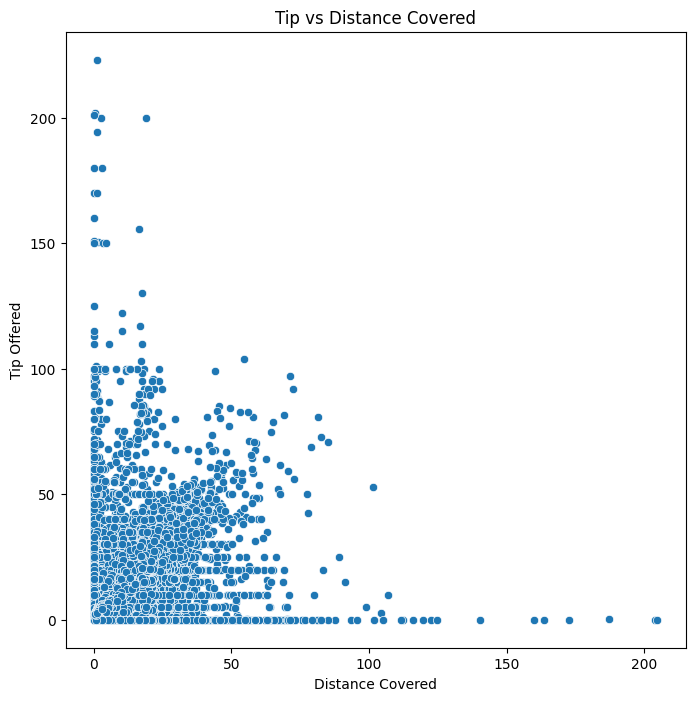

Correlation between Tip amount & Trip Distance: 0.57


In [51]:
# Show relationship between tip and trip distance

plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x="trip_distance" , y="tip_amount")
plt.xlabel("Distance Covered")
plt.ylabel("Tip Offered")
plt.title("Tip vs Distance Covered")
plt.show()

correlation = df["trip_distance"].corr(df["tip_amount"])
print(f"Correlation between Tip amount & Trip Distance: {correlation.round(2)}")

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

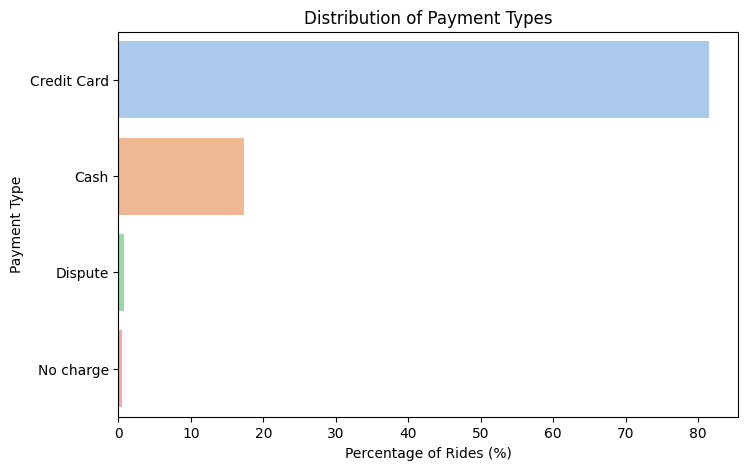

In [52]:
# Analyse the distribution of different payment types (payment_type).
payment_methods = {1: "Credit Card", 2: "Cash", 3: "No charge", 4: "Dispute"}
df["payment_type_name"] = df["payment_type"].map(payment_methods)

df_dist = df["payment_type_name"].value_counts(normalize=True) * 100

plt.figure(figsize=(8,5))
sns.barplot(x=df_dist.values, y=df_dist.index, palette="pastel")
plt.xlabel("Percentage of Rides (%)")
plt.ylabel("Payment Type")
plt.title("Distribution of Payment Types")
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute

##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [53]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [54]:
import geopandas as gpd


# Read the shapefile using geopandas
#zones = # read the .shp file using gpd
zones = gpd.read_file(r"C:\Users\Utkarsh Sharma\OneDrive\Desktop\EDA Assignment\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones")
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

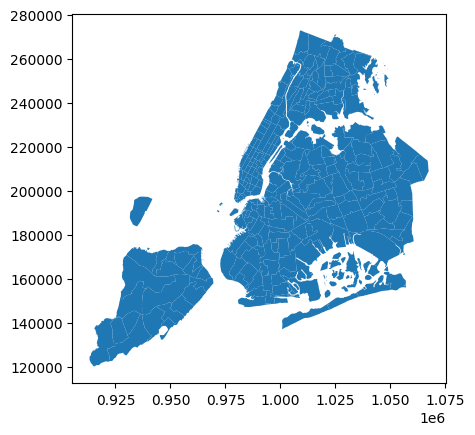

In [55]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [56]:
# Merge zones and trip records using locationID and PULocationID
merged_df = pd.merge(df, zones, left_on="PULocationID", right_on="LocationID", how="left")
merged_df.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,quarter,trip_duration,payment_type_name,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,1,15.950000,Cash,138.0,0.107467,0.000537,LaGuardia Airport,138.0,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031..."
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,1,5.083333,Credit Card,161.0,0.035804,0.000072,Midtown Center,161.0,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [57]:
# Group data by location and calculate the number of trips
trip_counts = df.groupby("PULocationID").size().reset_index(name="number_of_trips")
trip_counts.head() 

,PULocationID,number_of_trips
0,1,214
1,2,2
2,3,40
3,4,1861
4,5,13


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [58]:
# Merge trip counts back to the zones GeoDataFrame
merged_trip = pd.merge(zones, trip_counts, left_on="LocationID", right_on="PULocationID", how="left")
merged_trip.head(2)

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,number_of_trips
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.0,214.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0,2.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

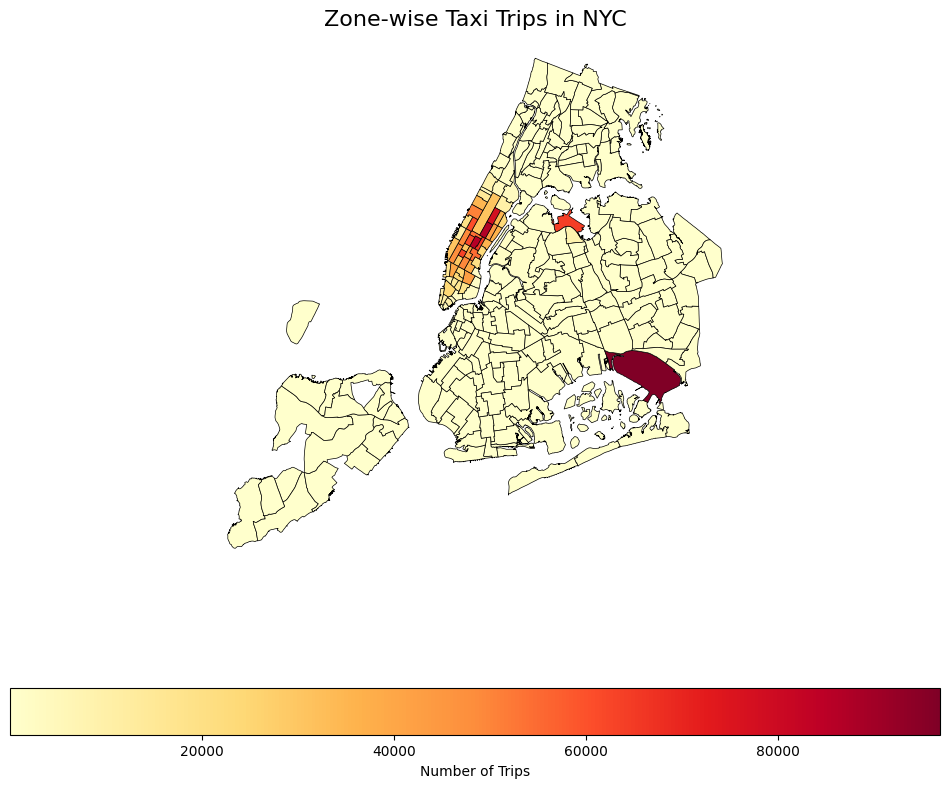

In [59]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
merged_trip.plot(
    column = "number_of_trips",
    ax = ax,
    legend = True,
    legend_kwds = {"label": "Number of Trips", 'orientation': "horizontal"},
    cmap="YlOrRd",
    edgecolor="black",
    linewidth=0.5
)

plt.title("Zone-wise Taxi Trips in NYC", fontsize=16)
plt.axis("off")
plt.show()

In [60]:
# can you try displaying the zones DF sorted by the number of trips?
merged_trip_sorted = merged_trip.sort_values(by="number_of_trips", ascending=False)
merged_trip_sorted.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,number_of_trips
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",132.0,96827.0
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",237.0,86905.0
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",161.0,85948.0
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",236.0,77517.0
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",162.0,65634.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [61]:
# Find routes which have the slowest speeds at different times of the day

df_route = df[['PULocationID', 'DOLocationID', 'trip_distance', 'tpep_pickup_datetime', 'tpep_dropoff_datetime']].copy()
df_route['trip_duration_hrs'] = (df_route['tpep_dropoff_datetime'] - df_route['tpep_pickup_datetime']).dt.total_seconds() / 3600
df_route = df_route[(df_route['trip_duration_hrs'] > 0) & (df_route['trip_distance'] > 0)]
df_route['pickup_hour'] = df_route['tpep_pickup_datetime'].dt.hour
grouped = df_route.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])
speed_data = grouped.agg({
    'trip_distance': 'mean',
    'trip_duration_hrs': 'mean'
}).reset_index()
speed_data['avg_speed_mph'] = speed_data['trip_distance'] / speed_data['trip_duration_hrs']
slowest_routes = speed_data.sort_values(by='avg_speed_mph').head(10)
print(slowest_routes[['PULocationID', 'DOLocationID', 'pickup_hour', 'avg_speed_mph']])


        PULocationID  DOLocationID  pickup_hour  avg_speed_mph
102294           232            65           13       0.005324
114929           243           264           17       0.007772
61252            142           142            5       0.023770
120428           258           258            1       0.026230
33393            100             7            8       0.039470
6451              40            65           21       0.046848
39490            113           235           22       0.048105
89226            194           194           16       0.048913
95261            226           145           18       0.051801
9705              45            45           10       0.059484


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

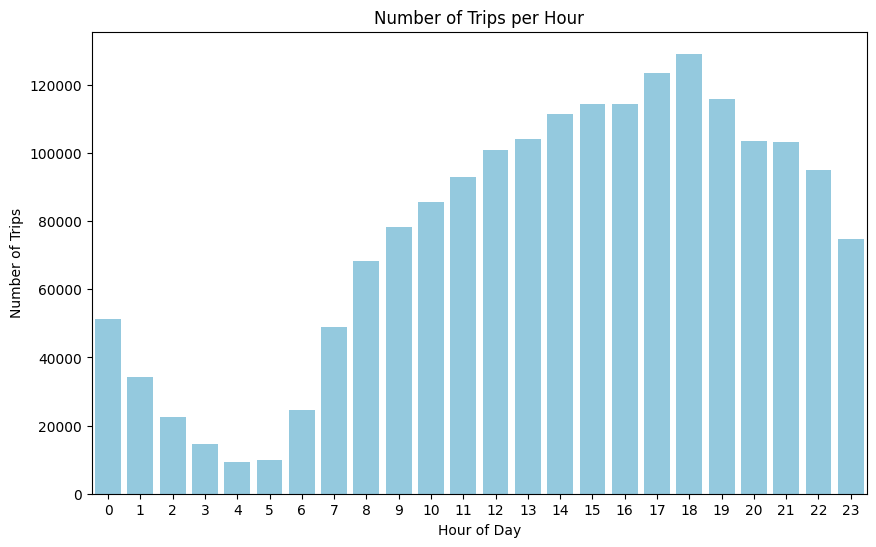

Busiest hour: 18 with 129190 trips


In [62]:
# Visualise the number of trips per hour and find the busiest hour
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
trips_per_hour = df.groupby("pickup_hour").size().reset_index(name="trip_count")
plt.figure(figsize=(10,6))
sns.barplot(data=trips_per_hour, x="pickup_hour", y="trip_count", color="skyblue")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.title("Number of Trips per Hour")
plt.xticks(range(0,24))
plt.show()
busiest_hour = trips_per_hour.loc[trips_per_hour["trip_count"].idxmax()]
print(f"Busiest hour: {busiest_hour['pickup_hour']} with {busiest_hour['trip_count']} trips")


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [63]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.10

trips_per_hour["scaled_trip_count"] = trips_per_hour["trip_count"] / sample_fraction
trips_per_hour["scaled_trip_count"]


0      511640.0
1      342780.0
2      225510.0
3      147100.0
4       94360.0
5      100210.0
6      244680.0
7      489900.0
8      682780.0
9      782890.0
10     856290.0
11     930370.0
12    1010040.0
13    1041070.0
14    1115760.0
15    1143010.0
16    1142890.0
17    1235630.0
18    1291900.0
19    1159200.0
20    1034350.0
21    1031670.0
22     951600.0
23     748280.0
Name: scaled_trip_count, dtype: float64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

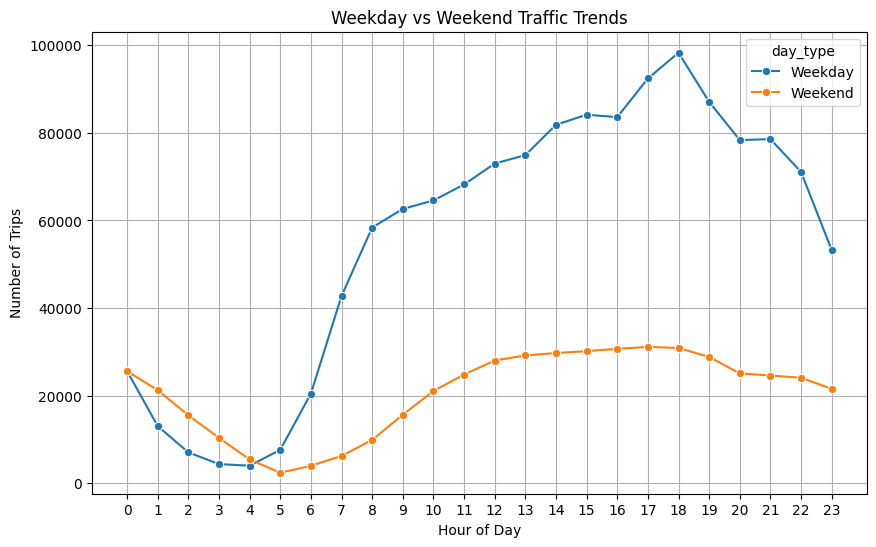

In [64]:
# Compare traffic trends for the week days and weekends

df["weekday_num"] = df["tpep_pickup_datetime"].dt.weekday

df["day_type"] = df["weekday_num"].map(lambda x: "Weekend" if x >= 5 else "Weekday")

df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
hourly_trend = df.groupby(["day_type", "pickup_hour"]).size().reset_index(name="trip_count")

plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_trend, x="pickup_hour", y="trip_count", hue="day_type", marker="o")
plt.title("Weekday vs Weekend Traffic Trends")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [65]:
# Find top 10 pickup and dropoff zones
top_pickup = (
    df["PULocationID"]
    .value_counts(normalize=False)
    .to_frame(name="count")
    .assign(proportion=lambda x: x["count"] / len(df))
    .head(10)
    .reset_index()
)

top_pickup.columns = ["PULocationID", "count", "proportion"]
top_pickup

,PULocationID,count,proportion
0,132,96827,0.052871
1,237,86905,0.047453
2,161,85948,0.046930
3,236,77517,0.042327
4,162,65634,0.035838
5,138,64177,0.035043
6,186,63471,0.034657
7,230,61315,0.033480
8,142,60887,0.033246
9,170,54493,0.029755


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [66]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_counts = df["PULocationID"].value_counts().rename("pickup_count")
dropoff_counts = df["DOLocationID"].value_counts().rename("dropoff_count")

pd_ratios = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)

pd_ratios["pickup_dropoff_ratio"] = pd_ratios["pickup_count"] / pd_ratios["dropoff_count"]

top_10 = pd_ratios.sort_values("pickup_dropoff_ratio", ascending=False).head(10)
bottom_10 = pd_ratios.sort_values("pickup_dropoff_ratio", ascending=True).head(10)

print("Top 10 pickup/dropoff ratios:")
print(top_10)

print("\nBottom 10 pickup/dropoff ratios:")
print(bottom_10)

Top 10 pickup/dropoff ratios:
     pickup_count  dropoff_count  pickup_dropoff_ratio
199           2.0            0.0                   inf
70         8354.0         1004.0              8.320717
132       96827.0        20969.0              4.617626
138       64177.0        22249.0              2.884489
186       63471.0        40116.0              1.582187
43        30752.0        22369.0              1.374760
114       24113.0        17540.0              1.374743
249       40406.0        30467.0              1.326222
162       65634.0        52248.0              1.256201
161       85948.0        71647.0              1.199604

Bottom 10 pickup/dropoff ratios:
     pickup_count  dropoff_count  pickup_dropoff_ratio
99            0.0            3.0              0.000000
30            0.0           18.0              0.000000
245           0.0           30.0              0.000000
176           0.0           12.0              0.000000
27            1.0           39.0              0.025641
2

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [67]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour

night_df = df[(df["pickup_hour"]>=23) | (df["pickup_hour"]<=5)]

top_night_pickups = night_df["PULocationID"].value_counts().head(10).reset_index()
top_night_pickups.columns = ["PULocationID", "pickup_count"]

top_night_dropoffs = night_df["DOLocationID"].value_counts().head(10).reset_index()
top_night_dropoffs.columns = ["DOLocationID", "dropoff_count"]


print("Top 10 pickup zones during night hours:")
print(top_night_pickups)

print("\nTop 10 dropoff zones during night hours:")
print(top_night_dropoffs)


Top 10 pickup zones during night hours:
   PULocationID  pickup_count
0            79         15552
1           132         14545
2           249         12472
3            48         10463
4           148          9629
5           114          8749
6           230          8206
7           186          6968
8           164          6143
9            68          6050

Top 10 dropoff zones during night hours:
   DOLocationID  dropoff_count
0            79           8314
1            48           6874
2           170           6266
3            68           5858
4           107           5757
5           141           5272
6           263           4978
7           249           4944
8           230           4641
9           148           4382


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [68]:
# Filter for night hours (11 PM to 5 AM)

df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour

day_df = df[(df["pickup_hour"]>=6) & (df["pickup_hour"]<=22)] # 6 AM - 10 PM
night_df = df[(df["pickup_hour"]>=23) | (df["pickup_hour"]<=5)] # 11 PM - 5 AM

day_revenue = day_df["total_amount"].sum()
night_revenue = night_df["total_amount"].sum()

total_revenue = df['total_amount'].sum()

day_revenue_share = (day_revenue / total_revenue) * 100
night_revenue_share = (night_revenue / total_revenue) * 100

print(f"Day revenue share: {day_revenue_share: .2f}%")
print(f"Night revenue share: {night_revenue_share: .2f}%")


Day revenue share:  87.94%
Night revenue share:  12.06%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [69]:
# Analyse the fare per mile per passenger for different passenger counts
df_fm = df[df["trip_distance"] > 0] # df_fm, fm = fare per mile

df_fm["fare_per_mile"] = df_fm["fare_amount"] / df_fm["trip_distance"]
df_fm["fare_per_mile_per_passenger"] = df_fm["fare_per_mile"] / df_fm["passenger_count"]
result = df_fm.groupby("passenger_count")["fare_per_mile_per_passenger"].mean().reset_index()

print(result)

   passenger_count  fare_per_mile_per_passenger
0              0.0                          inf
1              1.0                    11.056795
2              2.0                     6.431558
3              3.0                     3.907755
4              4.0                     4.362648
5              5.0                     1.709614
6              6.0                     1.350658


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [70]:
# Compare the average fare per mile for different days and for different times of the day
df_avg = df[df["trip_distance"] > 0]

df_avg["fare_per_mile"] = df_avg["fare_amount"] / df_avg["trip_distance"]

df_avg["day_of_week"] = df_avg["tpep_pickup_datetime"].dt.day_name()
df_avg["hour"] = df_avg["tpep_pickup_datetime"].dt.hour

avg_fare_per_day = df_avg.groupby("day_of_week")["fare_per_mile"].mean().reset_index()

def time_of_day(hour):
    if 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    elif 18 <= hour < 23:
        return "Evening"
    else:
        return "Night"

df_avg["time_of_day"] = df_avg["hour"].map(time_of_day)

avg_fare_per_time = df_avg.groupby("time_of_day")["fare_per_mile"].mean().reset_index()

print("Average Fare per Mile by Day of Week:")
print(avg_fare_per_day)
print("\nAverage Fare per Mile by Time of Day:")
print(avg_fare_per_time)



Average Fare per Mile by Day of Week:
  day_of_week  fare_per_mile
0      Friday      10.904293
1      Monday      10.990535
2    Saturday      10.923582
3      Sunday      12.535735
4    Thursday      11.267770
5     Tuesday      12.164876
6   Wednesday      11.112363

Average Fare per Mile by Time of Day:
  time_of_day  fare_per_mile
0   Afternoon      12.353860
1     Evening      10.562940
2     Morning      11.150876
3       Night      10.991294


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

   VendorID  pickup_hour  fare_per_mile
0         1            0       6.798078
1         1            1       7.056140
2         1            2       6.924459
3         1            3       6.508912
4         1            4       7.504026


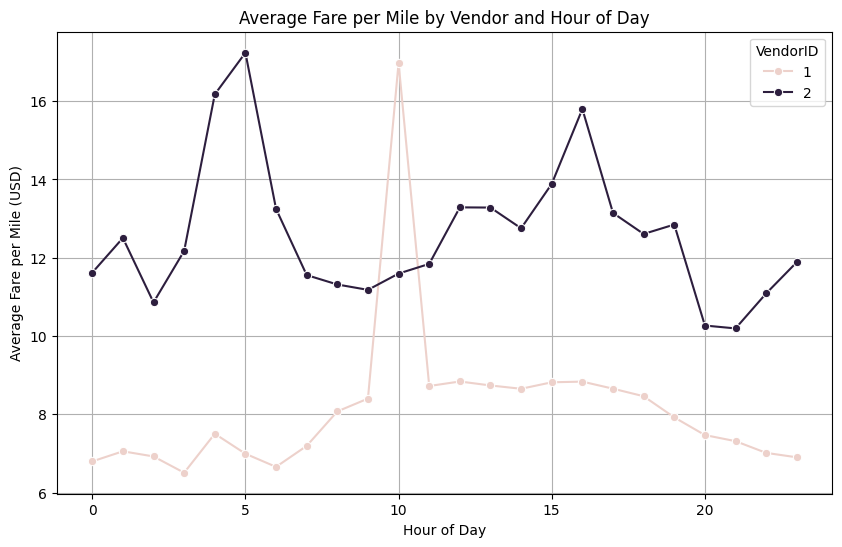

In [71]:
# Compare fare per mile for different vendors

df_pm = df[df["trip_distance"] > 0].copy() #pm = per mile

df_pm["fare_per_mile"] = df_pm["fare_amount"] / df_pm["trip_distance"]

df_pm["pickup_hour"] = df_pm["tpep_pickup_datetime"].dt.hour

avg_fare_per_mile = (
    df_pm.groupby(["VendorID", "pickup_hour"])["fare_per_mile"]
    .mean()
    .reset_index()
)
print(avg_fare_per_mile.head())

plt.figure(figsize=(10,6))
sns.lineplot(data=avg_fare_per_mile,x="pickup_hour",y="fare_per_mile",hue="VendorID",marker="o")
plt.title("Average Fare per Mile by Vendor and Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Fare per Mile (USD)")
plt.grid(True)
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


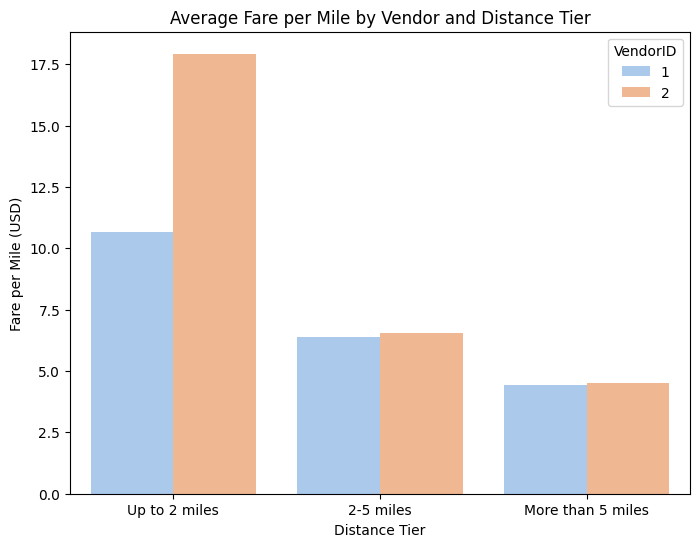

In [72]:
# Defining distance tiers
df_tiers = df[df["trip_distance"] > 0].copy()

df_tiers["fare_per_mile"] = df_tiers["fare_amount"] / df_tiers["trip_distance"]

df_tiers["distance_tier"] = pd.cut(df_tiers["trip_distance"],bins=[0, 2, 5, float("inf")],
                                   labels=["Up to 2 miles", "2-5 miles", "More than 5 miles"])

avg_fare_tiers = (df_tiers.groupby(["VendorID", "distance_tier"])["fare_per_mile"].mean().reset_index())

plt.figure(figsize=(8,6))
sns.barplot(data=avg_fare_tiers,x="distance_tier",y="fare_per_mile",hue="VendorID",palette="pastel")
plt.title("Average Fare per Mile by Vendor and Distance Tier")
plt.ylabel("Fare per Mile (USD)")
plt.xlabel("Distance Tier")
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

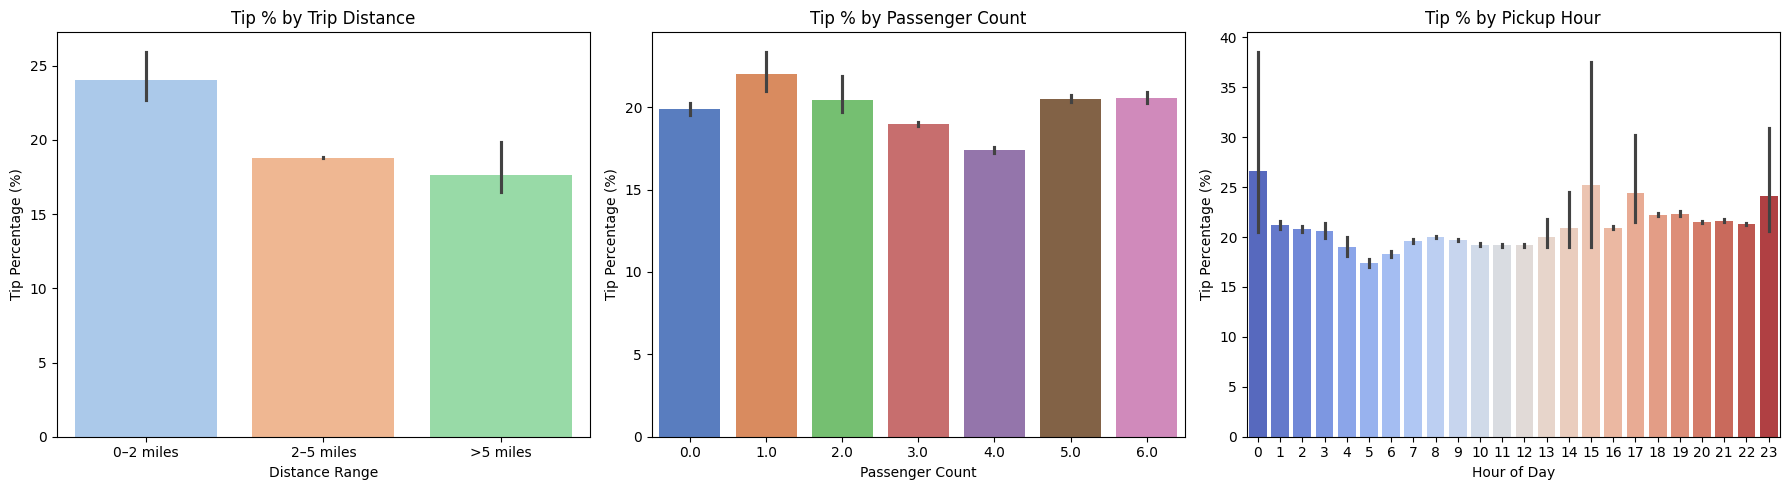

In [73]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df_tip = df[df["fare_amount"] > 0].copy()
df_tip["tip_percentage"] = (df_tip["tip_amount"] / df_tip["fare_amount"]) * 100

bins = [0, 2, 5, df_tip["trip_distance"].max()]
labels = ["0–2 miles", "2–5 miles", ">5 miles"]
df_tip["distance_range"] = pd.cut(df_tip["trip_distance"], bins=bins, labels=labels, right=False)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(data=df_tip, x="distance_range", y="tip_percentage", ax=axes[0], palette="pastel")
axes[0].set_title("Tip % by Trip Distance")
axes[0].set_xlabel("Distance Range")
axes[0].set_ylabel("Tip Percentage (%)")

sns.barplot(data=df_tip, x="passenger_count", y="tip_percentage", ax=axes[1], palette="muted")
axes[1].set_title("Tip % by Passenger Count")
axes[1].set_xlabel("Passenger Count")
axes[1].set_ylabel("Tip Percentage (%)")

df_tip["pickup_hour"] = df_tip["tpep_pickup_datetime"].dt.hour
sns.barplot(data=df_tip, x="pickup_hour", y="tip_percentage", ax=axes[2], palette="coolwarm")
axes[2].set_title("Tip % by Pickup Hour")
axes[2].set_xlabel("Hour of Day")
axes[2].set_ylabel("Tip Percentage (%)")

plt.tight_layout()
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

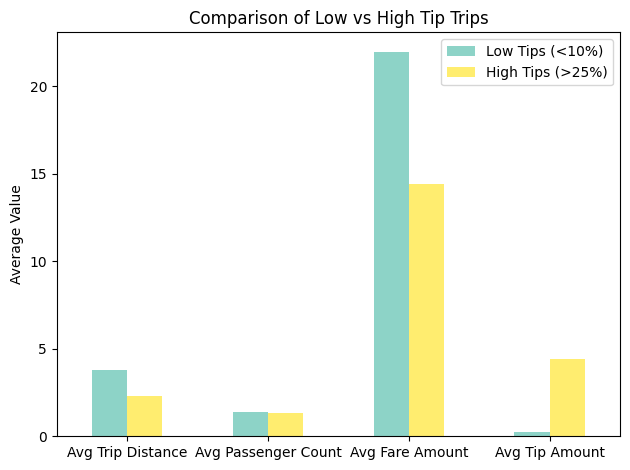

In [74]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

low_tips = df_tip[df_tip["tip_percentage"] < 10]
high_tips = df_tip[df_tip["tip_percentage"] > 25]

comparison = pd.DataFrame({
    'Low Tips (<10%)': [
        low_tips['trip_distance'].mean(),
        low_tips['passenger_count'].mean(),
        low_tips['fare_amount'].mean(),
        low_tips['tip_amount'].mean()
    ],
    'High Tips (>25%)': [
        high_tips['trip_distance'].mean(),
        high_tips['passenger_count'].mean(),
        high_tips['fare_amount'].mean(),
        high_tips['tip_amount'].mean()
    ]
},index=['Avg Trip Distance', 'Avg Passenger Count', 'Avg Fare Amount', 'Avg Tip Amount'])
comparison.plot(kind='bar', colormap="Set3")
plt.title('Comparison of Low vs High Tip Trips')
plt.ylabel('Average Value')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()-


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

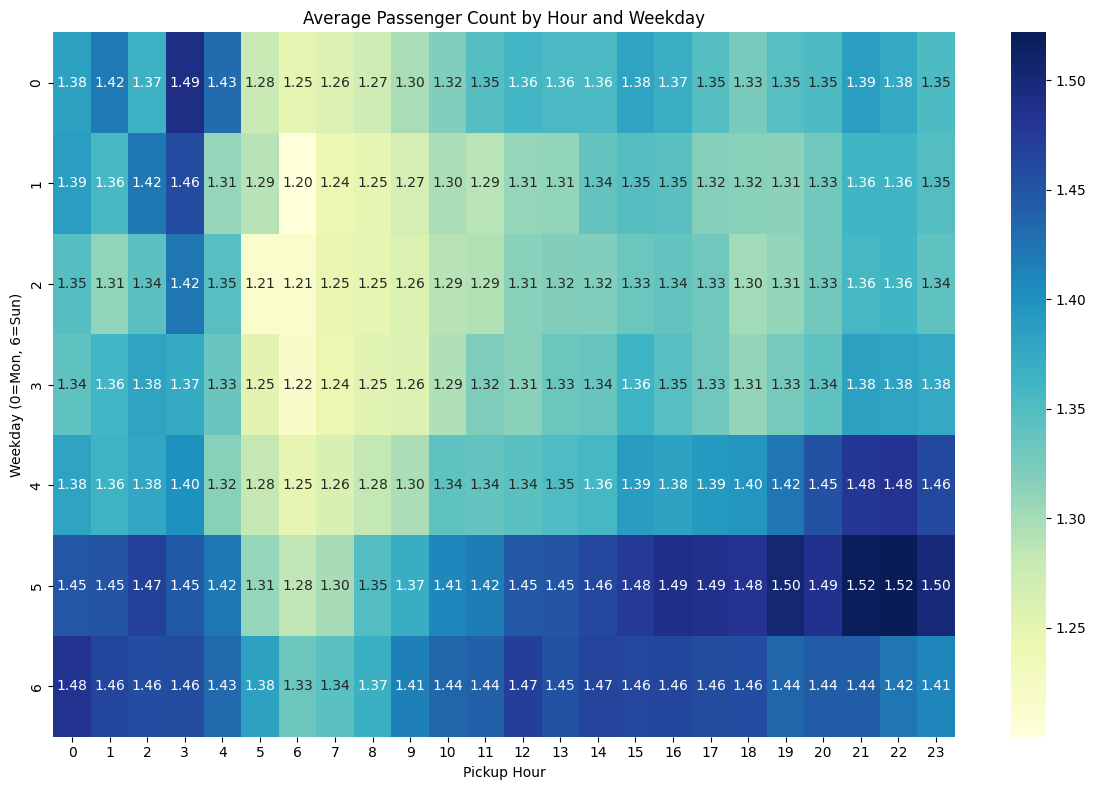

In [75]:
# See how passenger count varies across hours and days

df["pickup_hour"] = df["tpep_pickup_datetime"].dt.hour
df["pickup_weekday"] = df["tpep_pickup_datetime"].dt.weekday

pivot_table = (df.groupby(["pickup_weekday","pickup_hour"])["passenger_count"].mean().unstack())

plt.figure(figsize=(12,8))
sns.heatmap(data=pivot_table,cmap="YlGnBu",annot=True,fmt=".2f")
plt.xlabel("Pickup Hour")
plt.ylabel("Weekday (0=Mon, 6=Sun)")
plt.title("Average Passenger Count by Hour and Weekday")
plt.tight_layout()
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

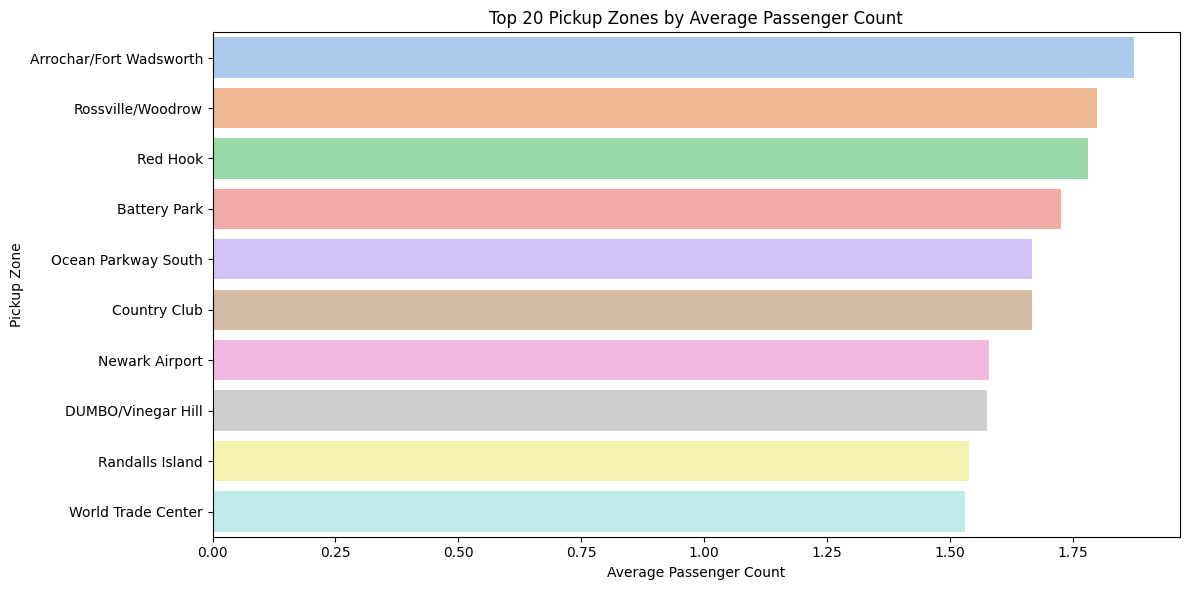

In [76]:
# How does passenger count vary across zones
passenger_avg = df.groupby("PULocationID")["passenger_count"].mean().reset_index()

passenger_avg = passenger_avg.merge(zones[["LocationID", "zone"]], left_on="PULocationID", right_on="LocationID", how="left")

passenger_avg = passenger_avg.sort_values(by="passenger_count", ascending=False).head(10)
20
plt.figure(figsize=(12, 6))
sns.barplot(data=passenger_avg, x="passenger_count", y="zone", palette="pastel")
plt.title("Top 20 Pickup Zones by Average Passenger Count")
plt.xlabel("Average Passenger Count")
plt.ylabel("Pickup Zone")
plt.tight_layout()
plt.show()

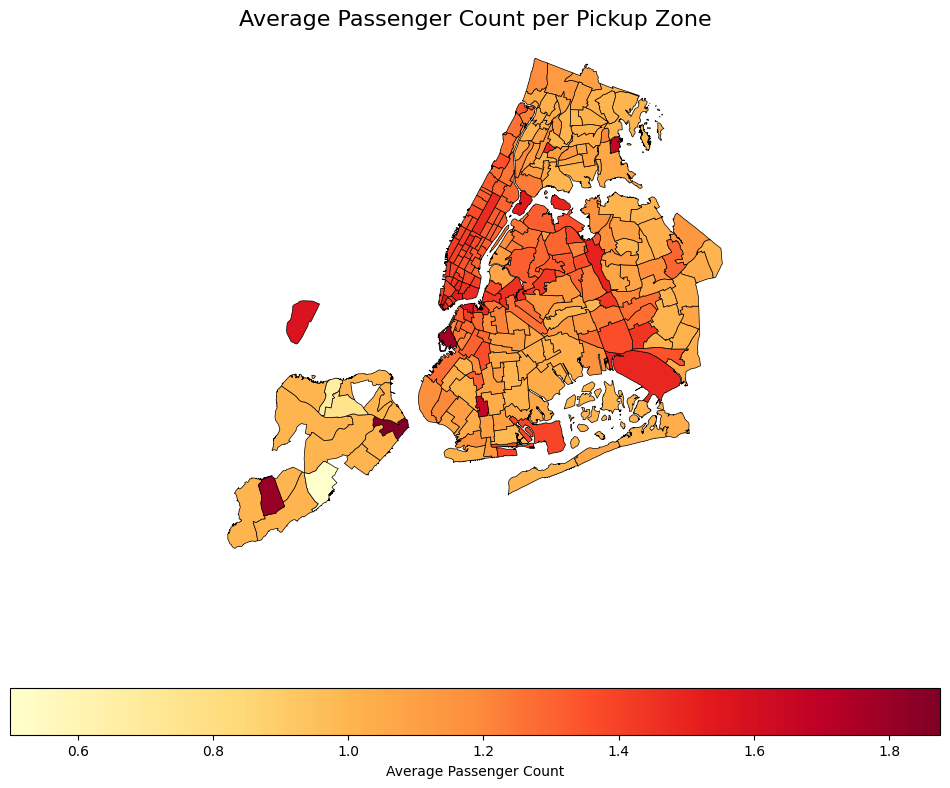

In [77]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
zones_trip = df.groupby("PULocationID")["passenger_count"].mean().reset_index()

zones_with_passenger = zones.merge(zones_trip, left_on="LocationID", right_on="PULocationID")

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones_with_passenger.plot(
    column="passenger_count",
    ax=ax,
    legend=True,
    legend_kwds={"label": "Average Passenger Count", "orientation": "horizontal"},
    cmap="YlOrRd",
    edgecolor="black",
    linewidth=0.5
)
plt.title("Average Passenger Count per Pickup Zone", fontsize=16)
plt.axis("off")
plt.show()



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [78]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Combined_Airport_fee',
       'Pickup_Date', 'Pickup_Time_Min', 'Dropoff_Date', 'Dropoff_Time_Min',
       'pickup_hour', 'daily_pickup', 'monthly_pickup', 'pickup_month',
       'quarter', 'trip_duration', 'payment_type_name', 'weekday_num',
       'day_type', 'pickup_weekday'],
      dtype='object')

Frequency of Surcharge Application (%):
extra                    61.942644
mta_tax                  99.066884
tip_amount               77.599868
tolls_amount              8.116399
improvement_surcharge    99.959757
congestion_surcharge     92.309561
Combined_Airport_fee      8.787583
dtype: float64


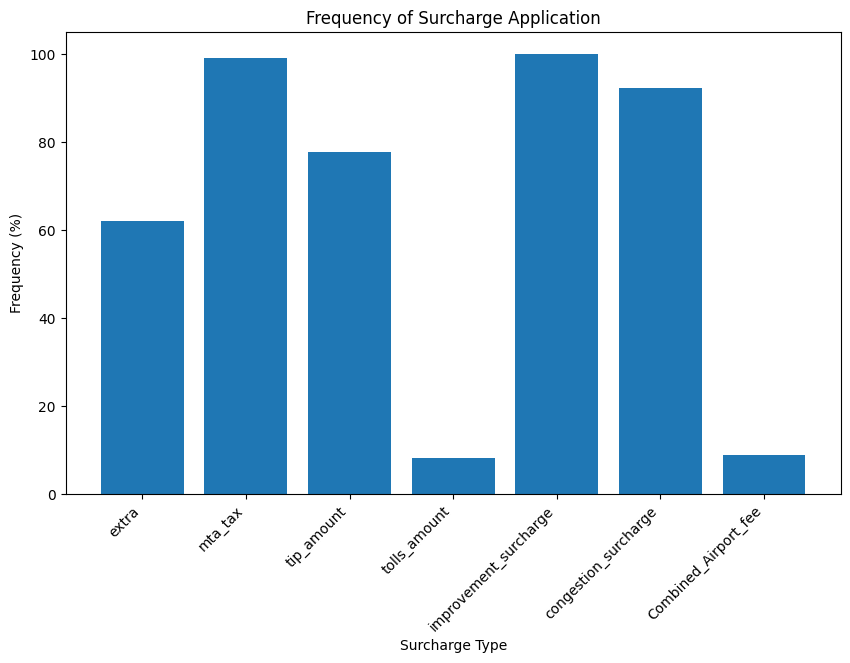

In [79]:
# How often is each surcharge applied?
surcharge_cols = [
    col for col in ["extra", "mta_tax", "tip_amount", "tolls_amount",
                    "improvement_surcharge", "congestion_surcharge",
                    "Combined_Airport_fee"] 
    if col in df.columns
]

surcharge_frequency = df[surcharge_cols].astype(bool).sum() / len(df) * 100

print("Frequency of Surcharge Application (%):")
print(surcharge_frequency)

plt.figure(figsize=(10, 6))
plt.bar(surcharge_frequency.index, surcharge_frequency.values)
plt.title("Frequency of Surcharge Application")
plt.xlabel("Surcharge Type")
plt.ylabel("Frequency (%)")
plt.xticks(rotation=45, ha="right")
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

1. Based on the pickup hour trends, taxi availability should be increased around 6:00 PM, when demand peaks.
2. From daily trends, Thursday consistently shows higher demand compared to other weekdays.
3. At the monthly level, May recorded the highest overall demand.
4. Additionally, demand during weekdays is significantly higher compared to weekends.
5. Night hours (especially 11 PM – 1 AM) show steady trip activity, likely from nightlife and late-shift workers. Allocating taxis to cover this period more effectively could improve revenue share from nighttime trips.
6. High-demand pickup zones should receive priority in dispatching, especially during peak hours and busy weekdays.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

1. Evening Peak (6–8 PM): Keep more cabs near offices, train stations, and bus stops.
2. Late Night (11 PM–2 AM): Move cabs to nightlife areas like bars and clubs.
3. Weekdays: Focus on office areas and transport hubs.Weekends - Shift to shopping areas, parks, and event spots.
4. Busy Months (e.g., May): Add more cabs to tourist zones and airports.
5. Low-demand Times: Keep cabs near hospitals, malls, colleges, and schools.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

1. Offer targeted discounts during slow hours to increase ridership.
2. Launch monthly or weekly passes for frequent travelers.
3. Ensure taxi availability in high-demand zones during peak hours (e.g., 10 AM, 6 PM).
4. Give special offers for rides to/from airports and stations.
5. Reward customers with cashback or ride credits.
6. Adjust pricing by zone based on past days demand.
7. Offer pre-booking discounts for early reservations.